In [1]:
from nem.util import load_songs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
songs = load_songs('../songs_filtered.csv')

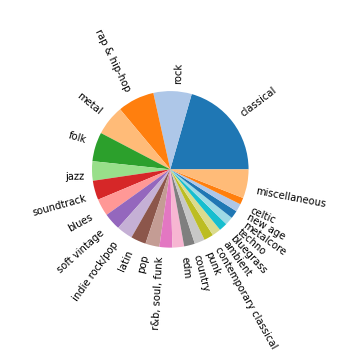

In [3]:
counts = songs.groupby('metagenre').name.count()
counts = counts.sort_values(ascending=False)
counts = counts.iloc[1:]
N = len(counts)
misc_genres = counts.iloc[-9:].index
counts['miscellaneous'] = counts.iloc[-9:].sum()
counts = counts.iloc[list(range(0, N-9)) + [N]]

with plt.style.context({"axes.prop_cycle" : plt.cycler("color", plt.cm.tab20.colors)}):
    counts.plot.pie(figsize=(6,6), label='', rotatelabels=True, radius=0.6)
plt.savefig('../figures/genre_distribution.pdf', bbox_inches='tight')

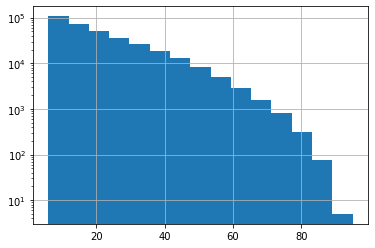

In [4]:
songs.loc[songs.popularity > 5.0].popularity.hist(bins=15)
plt.yscale('log')

In [5]:
songs_2 = songs.loc[~songs.metagenre.isin(misc_genres)].loc[songs.metagenre != 'unknown']
songs_2 = songs_2.loc[songs_2.popularity >= 0.0]
#songs_2['log_popularity'] = songs_2.popularity.apply(np.log10)

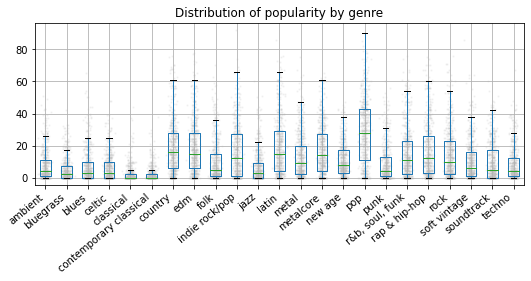

In [6]:
fig, ax = plt.subplots(figsize=(8.5,3))

for i, (_, group) in enumerate(songs_2.groupby('metagenre')):
    y = np.random.choice(group.popularity, 600, replace=False)
    plt.scatter(np.random.normal(i+1, 0.1, size=len(y)), y, alpha=0.13, color='silver', s=1.5)

songs_2.boxplot('popularity', by='metagenre', showfliers=False, ax=ax)
ax = plt.gca()
_ = ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.title('Distribution of popularity by genre')
plt.suptitle('')
plt.xlabel('')
fig.savefig('../figures/popularity_distribution_by_genre.pdf', bbox_inches='tight')

